<a href="https://colab.research.google.com/github/tankTopTaro/DOST-FNRI-Assessment/blob/main/DOST_FNRI_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Technical Specialist IV Exam

## Part I.
  1. Train a machine learning model.
  2. Deploy the model to the web.
  
**The Problem:**
  Predict if an Australian will buy a bike according to the factors in the dataset.

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tankTopTaro/DOST-FNRI-Assessment/refs/heads/main/AW_all_data.csv')
df.head()

,Unnamed: 0,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,...,Professional,0,1,1,0,0,2,137947,89,0
1,1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,...,Professional,0,0,0,1,3,3,101141,117,1
2,2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,...,Professional,0,1,1,1,3,3,91945,123,0
3,3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,...,Professional,1,0,0,1,0,0,86688,50,0
4,4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,...,Professional,1,0,1,4,5,5,92771,95,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16404 entries, 0 to 16403
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            16404 non-null  int64 
 1   CustomerID            16404 non-null  int64 
 2   FirstName             16404 non-null  object
 3   LastName              16404 non-null  object
 4   AddressLine1          16404 non-null  object
 5   City                  16404 non-null  object
 6   StateProvinceName     16404 non-null  object
 7   CountryRegionName     16404 non-null  object
 8   PostalCode            16404 non-null  object
 9   PhoneNumber           16404 non-null  object
 10  BirthDate             16404 non-null  object
 11  Education             16404 non-null  object
 12  Occupation            16404 non-null  object
 13  Gender                16404 non-null  int64 
 14  MaritalStatus         16404 non-null  int64 
 15  HomeOwnerFlag         16404 non-null

In [4]:
df.describe()

,Unnamed: 0,CustomerID,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,8201.500000,20240.143136,0.494635,0.539624,0.674104,1.499756,0.991100,2.004511,78128.531517,72.389905,0.332297
std,4735.571243,5340.370705,0.499986,0.498443,0.468723,1.139135,1.514278,1.682318,39726.533060,27.269568,0.471051
min,0.000000,11000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,4100.750000,15617.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,47811.750000,52.000000,0.000000
50%,8201.500000,20231.500000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,12302.250000,24862.250000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,105200.250000,84.000000,1.000000
max,16403.000000,29482.000000,1.000000,1.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


## Correlate the Data to 'BikeBuyer'

In [5]:
df

,Unnamed: 0,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,...,Professional,0,1,1,0,0,2,137947,89,0
1,1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,...,Professional,0,0,0,1,3,3,101141,117,1
2,2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,...,Professional,0,1,1,1,3,3,91945,123,0
3,3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,...,Professional,1,0,0,1,0,0,86688,50,0
4,4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,...,Professional,1,0,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16399,16399,29478,Darren,Carlson,5240 Premier Pl.,Stoke-on-Trent,England,United Kingdom,AS23,1 (11) 500 555-0132,...,Clerical,0,0,1,0,0,3,45986,65,0
16400,16400,29479,Tommy,Tang,"111, rue Maillard",Versailles,Yveline,France,78000,1 (11) 500 555-0136,...,Clerical,0,1,1,0,0,1,80049,77,0
16401,16401,29480,Nina,Raji,9 Katherine Drive,London,England,United Kingdom,SW19 3RU,1 (11) 500 555-0146,...,Clerical,1,0,1,0,0,3,60417,48,1
16402,16402,29481,Ivan,Suri,Knaackstr 4,Hof,Bayern,Germany,95010,1 (11) 500 555-0144,...,Clerical,0,0,0,0,0,3,66653,65,0


### Selecting only customers from Australia

In [6]:
australian_df = df[df['CountryRegionName'].isin(['Australia'])].copy()
australian_df

,Unnamed: 0,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,...,Professional,0,1,1,0,0,2,137947,89,0
1,1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,...,Professional,0,0,0,1,3,3,101141,117,1
2,2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,...,Professional,0,1,1,1,3,3,91945,123,0
3,3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,...,Professional,1,0,0,1,0,0,86688,50,0
4,4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,...,Professional,1,0,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16382,16382,29461,Colin,Xu,1654 Bonari Court,Findon,South Australia,Australia,5023,1 (11) 500 555-0146,...,Manual,0,1,1,2,0,0,17045,62,0
16383,16383,29462,Clinton,Hernandez,1733 Thistle Circle,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0189,...,Clerical,0,0,1,0,0,0,39354,66,0
16384,16384,29463,Lucas,Gonzales,6908 Woodchuck Pl.,Gold Coast,Queensland,Australia,4217,1 (11) 500 555-0172,...,Manual,0,0,1,0,1,1,21359,67,0
16385,16385,29464,Eugene,Gao,4581 Coldwater Drive,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0177,...,Manual,0,0,0,0,1,1,12002,67,0


In [7]:
# Dropping unnecessary columns
drop_cols = ['Unnamed: 0', 'CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate']
australian_df = australian_df.drop(columns=drop_cols, axis=1, inplace=False)
australian_df.reset_index(drop=True, inplace=True)
australian_df

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,Bachelors,Professional,0,1,1,0,0,2,137947,89,0
1,Bachelors,Professional,0,0,0,1,3,3,101141,117,1
2,Bachelors,Professional,0,1,1,1,3,3,91945,123,0
3,Bachelors,Professional,1,0,0,1,0,0,86688,50,0
4,Bachelors,Professional,1,0,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...
3189,High School,Manual,0,1,1,2,0,0,17045,62,0
3190,Bachelors,Clerical,0,0,1,0,0,0,39354,66,0
3191,High School,Manual,0,0,1,0,1,1,21359,67,0
3192,High School,Manual,0,0,0,0,1,1,12002,67,0


In [8]:
a = {'bachelors': 0, 'partial college': 1, 'high school': 2, 'graduate degree': 3, 'partial high school': 4}
australian_df['Education'] = australian_df['Education'].str.strip().str.lower()
australian_df['Education'] = australian_df['Education'].replace(a)

b = {'professional': 0, 'skilled manual': 1, 'management': 2, 'clerical': 3, 'manual': 4}
australian_df['Occupation'] = australian_df['Occupation'].str.strip().str.lower()
australian_df['Occupation'] = australian_df['Occupation'].replace(b)

In [9]:
cor = australian_df.corr()
cor

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
Education,1.000000,0.454069,0.009238,0.096483,0.088102,0.073955,0.167358,0.286883,-0.072837,0.073909,-0.046956
Occupation,0.454069,1.000000,-0.023044,0.051354,-0.028285,-0.266648,-0.133760,-0.071683,-0.496300,-0.224603,-0.259998
Gender,0.009238,-0.023044,1.000000,-0.061102,-0.009969,-0.008874,0.004329,-0.005286,-0.174447,-0.509600,-0.123289
MaritalStatus,0.096483,0.051354,-0.061102,1.000000,0.257500,0.074845,0.195229,0.268232,-0.041858,0.236570,-0.139176
HomeOwnerFlag,0.088102,-0.028285,-0.009969,0.257500,1.000000,0.041913,0.207267,0.209286,0.046821,0.180389,0.022444
NumberCarsOwned,0.073955,-0.266648,-0.008874,0.074845,0.041913,1.000000,0.476793,0.447080,0.296864,0.410531,0.242031
NumberChildrenAtHome,0.167358,-0.133760,0.004329,0.195229,0.207267,0.476793,1.000000,0.826268,0.341280,0.792998,0.522973
TotalChildren,0.286883,-0.071683,-0.005286,0.268232,0.209286,0.447080,0.826268,1.000000,0.184613,0.642136,0.346069
YearlyIncome,-0.072837,-0.496300,-0.174447,-0.041858,0.046821,0.296864,0.341280,0.184613,1.000000,0.565635,0.406252
AveMonthSpend,0.073909,-0.224603,-0.509600,0.236570,0.180389,0.410531,0.792998,0.642136,0.565635,1.000000,0.520992


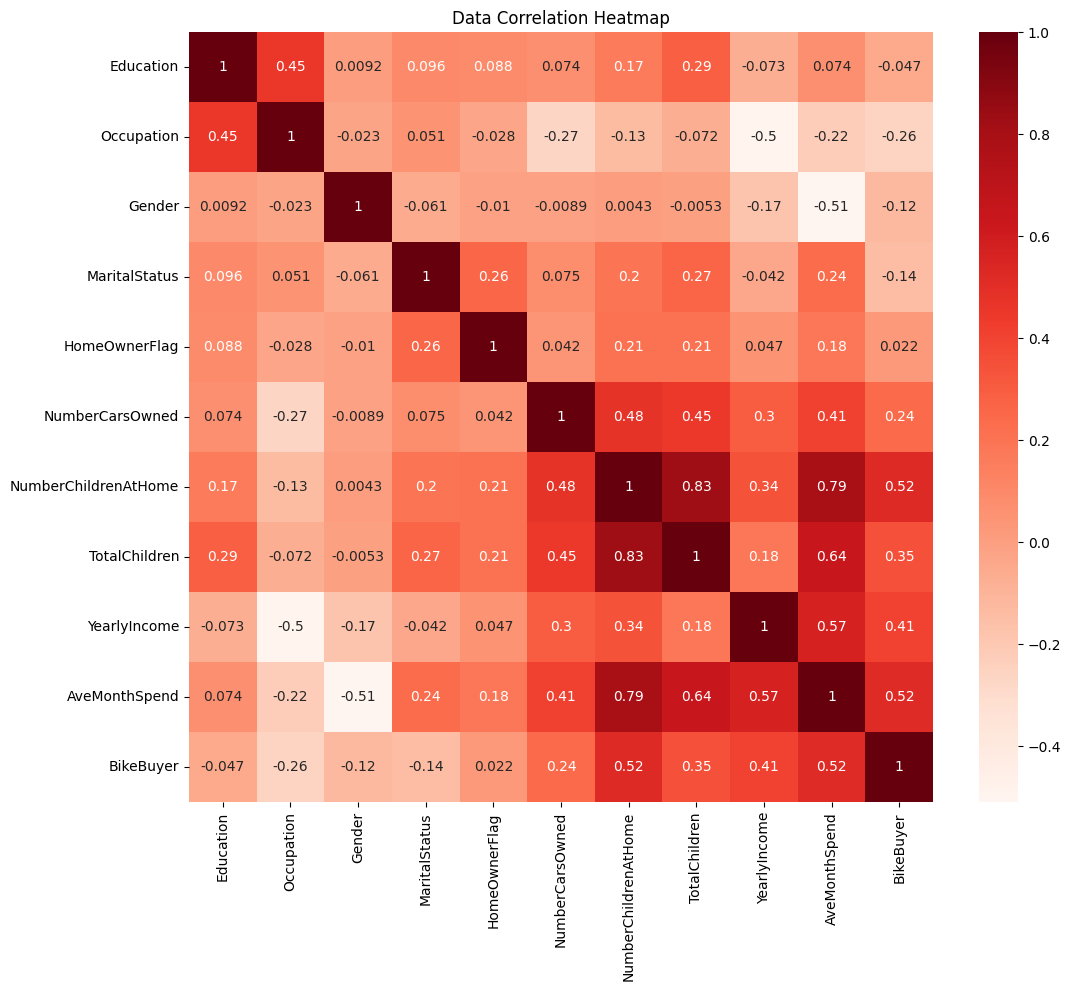

In [10]:
import seaborn as sns

plt.figure(figsize=(12, 10))
cor = australian_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Data Correlation Heatmap')
plt.show()

# Time to build the model

In [11]:
# Preprocess the data
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tabulate import tabulate

Table = []

features = ['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AveMonthSpend']
X = australian_df[features]
y = australian_df['BikeBuyer']

ct = make_column_transformer(
    (MinMaxScaler(), features)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [12]:
X_train_normal.shape, X_test_normal.shape, y_train.shape, y_test.shape

((2555, 10), (639, 10), (2555,), (639,))

In [13]:
australian_df.groupby('BikeBuyer').size()

,0
BikeBuyer,
0,1973
1,1221


In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

model = SVC()

grid = GridSearchCV(model, parameters, refit=True, verbose=3)
grid.fit(X_train_normal, y_train)

predictions = grid.predict(X_test_normal)

print(grid.best_estimator_)
print(grid.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.800 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.787 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.785 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.777 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.796 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [33]:
scores = cross_val_score(grid, X_train_normal, y_train, cv=5)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.770 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.807 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.801 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.800 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.790 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.792 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.787 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.777 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.792 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [34]:
accuracy = scores.mean()
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")
comparisons_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
comparisons_df

Accuracy: 80.00%


,Actual,Predicted
567,0,0
102,0,0
1106,0,1
17,0,0
1506,0,0
...,...,...
718,0,0
2748,1,1
2506,1,1
3030,0,0


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get predictions on the test set
y_pred = grid.predict(X_test_normal)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       395
           1       0.79      0.66      0.72       244

    accuracy                           0.80       639
   macro avg       0.80      0.77      0.78       639
weighted avg       0.80      0.80      0.80       639

[[352  43]
 [ 84 160]]


In [35]:
# Saving the model
import joblib

joblib.dump(grid, 'australian_bike_buyer.pkl')

['australian_bike_buyer.pkl']